In [1]:
!pip install blocksnet==0.0.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 317.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import geopandas as gpd
from blocksnet.preprocessing import LandUseProcessor
from blocksnet import City
from blocksnet import GraphGenerator
from blocksnet import AdjacencyCalculator
from shapely import distance

In [2]:
!gdown 1jlwMYDrFJtMpYAANvyOCv0_nnoFBvMhV
!gdown 1kqVGX1K0cBzw__b-G9RTyUpaavu7ANG2
!gdown 1MsAlROeN4f3OaFWmHIjCuNRIpjklunSu
!gdown 1hVNCZgtAqOutjNETuavDA-l6OAN5l-bh
!gdown 1zppzfP_eUQ-hR20MsqBvpc2gpo7q3_dl

Downloading...
From: https://drive.google.com/uc?id=1jlwMYDrFJtMpYAANvyOCv0_nnoFBvMhV
To: /content/blocks.parquet
100% 3.64M/3.64M [00:00<00:00, 191MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kqVGX1K0cBzw__b-G9RTyUpaavu7ANG2
To: /content/pzz.geojson
100% 41.8M/41.8M [00:00<00:00, 60.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MsAlROeN4f3OaFWmHIjCuNRIpjklunSu
To: /content/buildings.parquet
100% 23.8M/23.8M [00:00<00:00, 187MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hVNCZgtAqOutjNETuavDA-l6OAN5l-bh
To: /content/kindergarten.parquet
100% 324k/324k [00:00<00:00, 89.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zppzfP_eUQ-hR20MsqBvpc2gpo7q3_dl
To: /content/school.parquet
100% 200k/200k [00:00<00:00, 93.4MB/s]


In [3]:
blocks = gpd.read_parquet('blocks.parquet')
crs = blocks.estimate_utm_crs()
blocks = blocks.to_crs(crs)
blocks.head()

,geometry,land_use_1,land_use_2,land_use_3
0,"POLYGON ((355560.390 6648337.904, 355563.648 6...",TRANSPORT,None,None
1,"POLYGON ((355572.149 6648335.572, 355567.560 6...",TRANSPORT,None,None
2,"POLYGON ((355572.149 6648335.572, 355583.354 6...",RESIDENTIAL,None,None
3,"POLYGON ((355923.192 6648257.264, 355912.941 6...",RECREATION,None,None
4,"POLYGON ((355923.192 6648257.264, 355930.255 6...",TRANSPORT,None,None


In [4]:
zones = gpd.read_file('pzz.geojson')
zones = zones.to_crs(crs)
zones.head()

,zone,geometry
0,Т1Ж2-2,"MULTIPOLYGON (((349202.695 6660862.796, 349199..."
1,Т1Ж2-2,"MULTIPOLYGON (((345558.116 6666406.372, 345528..."
2,Т1Ж2-2,"MULTIPOLYGON (((347805.242 6663237.649, 347790..."
3,Т1Ж2-2,"MULTIPOLYGON (((346292.257 6667294.593, 346266..."
4,Т1Ж2-2,"MULTIPOLYGON (((350166.384 6660332.141, 350186..."


In [5]:
lu = LandUseProcessor(blocks=blocks, zones=zones)

In [6]:
lu.get_blocks()

,geometry,land_use_1,land_use_2,land_use_3
0,"POLYGON ((355560.390 6648337.904, 355563.648 6...",TRANSPORT,NaN,NaN
1,"POLYGON ((355572.149 6648335.572, 355567.560 6...",TRANSPORT,NaN,NaN
2,"POLYGON ((355572.149 6648335.572, 355583.354 6...",RESIDENTIAL,NaN,NaN
3,"POLYGON ((355923.192 6648257.264, 355912.941 6...",RECREATION,NaN,NaN
4,"POLYGON ((355923.192 6648257.264, 355930.255 6...",TRANSPORT,NaN,NaN
...,...,...,...,...
10842,"POLYGON ((352657.680 6645832.782, 352651.862 6...",TRANSPORT,NaN,NaN
10843,"POLYGON ((342484.147 6641266.529, 342509.266 6...",TRANSPORT,NaN,NaN
10844,"POLYGON ((342861.945 6640834.279, 342845.267 6...",TRANSPORT,NaN,NaN
10845,"POLYGON ((342895.099 6640804.207, 342861.945 6...",TRANSPORT,NaN,NaN


In [7]:
blocks = lu.get_blocks().rename(columns={'land_use_1':'land_use'})

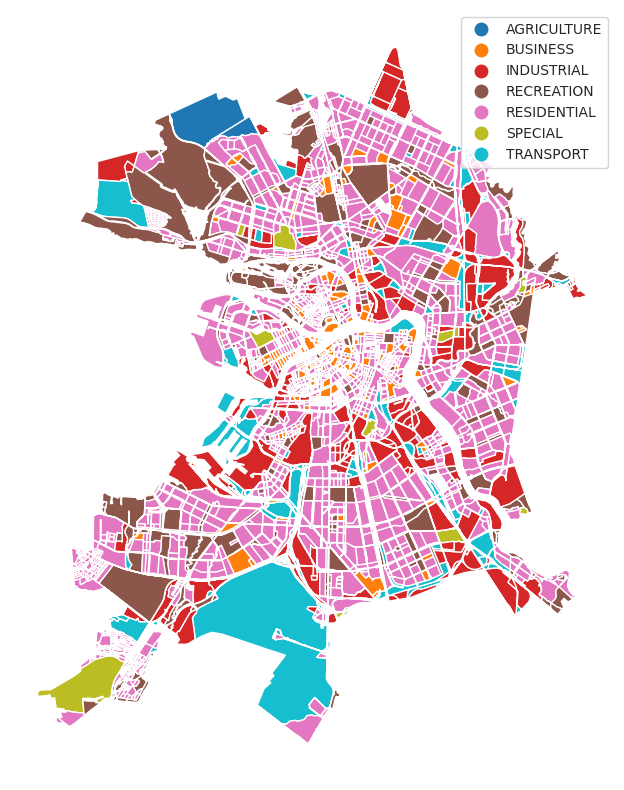

In [8]:
blocks.plot(column='land_use', figsize=(10,10), legend=True).set_axis_off()

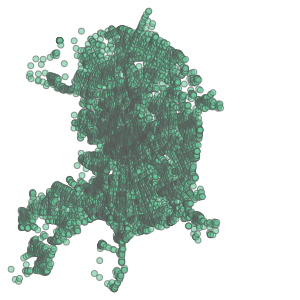

In [9]:
centroid = blocks.representative_point().unary_union.centroid
blocks.representative_point().unary_union

In [10]:
gpd.GeoDataFrame(geometry=[centroid], crs=crs).explore()

In [11]:
blocks['distance'] = blocks['geometry'].apply(lambda g : distance(g, centroid))
blocks.head()

,geometry,land_use,land_use_2,land_use_3,distance
0,"POLYGON ((355560.390 6648337.904, 355563.648 6...",TRANSPORT,NaN,NaN,5460.215306
1,"POLYGON ((355572.149 6648335.572, 355567.560 6...",TRANSPORT,NaN,NaN,5756.711449
2,"POLYGON ((355572.149 6648335.572, 355583.354 6...",RESIDENTIAL,NaN,NaN,5461.012054
3,"POLYGON ((355923.192 6648257.264, 355912.941 6...",RECREATION,NaN,NaN,5765.594882
4,"POLYGON ((355923.192 6648257.264, 355930.255 6...",TRANSPORT,NaN,NaN,5956.098005


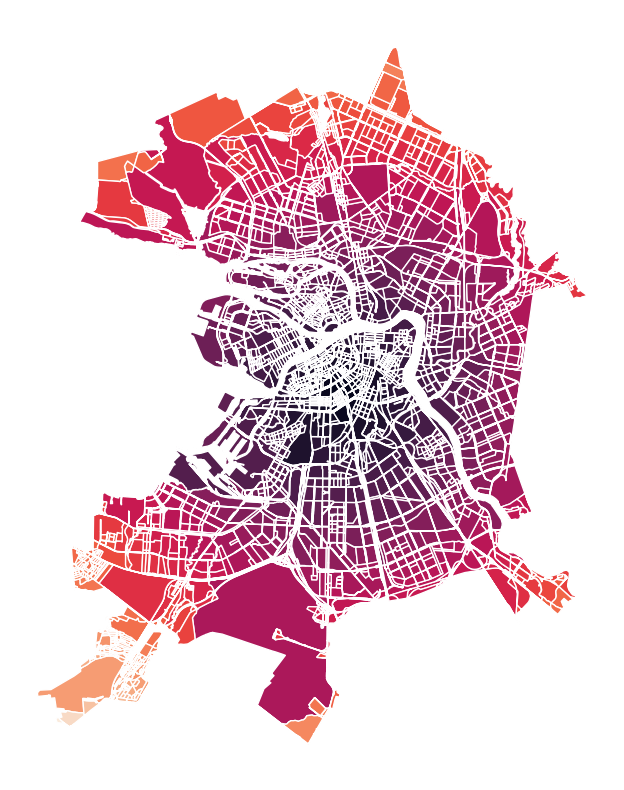

In [12]:
blocks.plot(column='distance', figsize=(10,10)).set_axis_off()

In [13]:
blocks = blocks[blocks['distance'] <= 4000]
blocks = blocks.reset_index(drop=True)
blocks

,geometry,land_use,land_use_2,land_use_3,distance
0,"POLYGON ((346322.136 6644661.144, 346320.245 6...",TRANSPORT,NaN,NaN,3747.897439
1,"POLYGON ((346314.470 6644486.283, 346315.077 6...",RESIDENTIAL,TRANSPORT,NaN,3777.911993
2,"POLYGON ((349432.893 6648677.425, 349450.028 6...",RESIDENTIAL,TRANSPORT,NaN,3513.455155
3,"POLYGON ((349466.669 6648716.319, 349459.119 6...",RESIDENTIAL,TRANSPORT,NaN,3511.156100
4,"POLYGON ((350769.003 6647816.622, 350769.684 6...",BUSINESS,NaN,NaN,2443.587811
...,...,...,...,...,...
2222,"POLYGON ((352668.388 6645858.409, 352668.862 6...",TRANSPORT,NaN,NaN,2093.825671
2223,"POLYGON ((352668.388 6645858.409, 352668.444 6...",TRANSPORT,NaN,NaN,2098.519529
2224,"POLYGON ((352688.929 6645759.663, 352691.038 6...",TRANSPORT,NaN,NaN,2098.357873
2225,"POLYGON ((352691.038 6645783.113, 352691.154 6...",TRANSPORT,NaN,NaN,2105.363107


In [14]:
gg = GraphGenerator(territory=blocks)

In [15]:
graph = gg.get_graph('intermodal')

Graph made for 'walk' network type
Graph made for 'bus'
Graph made for 'trolleybus'
Graph made for 'tram'
Graph made for 'subway'


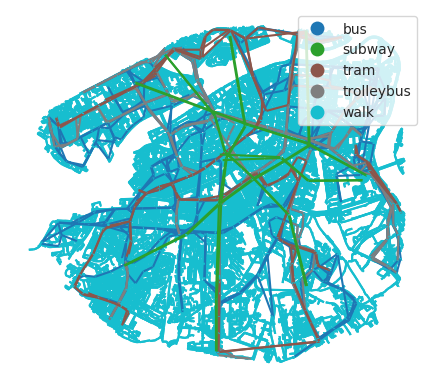

In [16]:
gg.plot(graph)

In [17]:
ac = AdjacencyCalculator(blocks=blocks, graph=graph)

In [19]:
adj_mtrx = ac.get_dataframe()
adj_mtrx

,0,1,2,3,4,5,6,7,8,9,...,2217,2218,2219,2220,2221,2222,2223,2224,2225,2226
0,0.0,17.8,42.8,39.8,43.5,43.2,41.3,44.7,35.4,28.4,...,45.4,47.3,47.9,45.4,47.9,45.4,45.4,47.9,47.9,45.4
1,16.8,0.0,40.6,37.6,41.3,41.0,39.1,42.5,33.2,26.2,...,44.3,48.3,46.8,44.3,46.8,44.3,44.3,46.8,46.8,44.3
2,43.7,38.3,0.0,3.3,30.8,30.5,33.1,39.4,32.8,26.1,...,34.6,43.0,37.1,34.6,37.1,34.6,34.6,37.1,37.1,34.6
3,41.0,35.6,3.3,0.0,28.1,27.8,30.4,36.7,30.1,23.4,...,31.9,40.3,34.4,31.9,34.4,31.9,31.9,34.4,34.4,31.9
4,48.3,43.7,29.6,30.1,0.0,0.3,23.6,17.6,26.8,23.5,...,34.7,43.1,37.2,34.7,37.2,34.7,34.7,37.2,37.2,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,43.6,43.6,36.9,33.9,36.0,35.7,24.4,32.8,32.7,26.7,...,0.0,23.8,3.5,0.0,3.5,0.0,0.0,3.5,3.5,0.0
2223,43.6,43.6,36.9,33.9,36.0,35.7,24.4,32.8,32.7,26.7,...,0.0,23.8,3.5,0.0,3.5,0.0,0.0,3.5,3.5,0.0
2224,46.1,46.1,39.4,36.4,38.5,38.2,26.9,35.3,35.2,29.2,...,3.5,26.3,0.0,3.5,0.0,3.5,3.5,0.0,0.0,3.5
2225,46.1,46.1,39.4,36.4,38.5,38.2,26.9,35.3,35.2,29.2,...,3.5,26.3,0.0,3.5,0.0,3.5,3.5,0.0,0.0,3.5


In [20]:
adj_mtrx.to_pickle('adj_mtrx.pickle')
blocks.to_parquet('filtered_blocks.parquet')

In [21]:
city = City(blocks, adj_mtrx)

In [22]:
city.to_pickle('empty_city.pickle')

In [23]:
buildings = gpd.read_parquet('buildings.parquet')
buildings = buildings.rename(columns={
  'storeys_count': 'number_of_floors',
  'population_balanced': 'population',
}).to_crs(city.crs)
buildings['number_of_floors'] = buildings['number_of_floors'].fillna(1)
buildings['build_floor_area'] = buildings.apply(lambda s : s.geometry.area * s.number_of_floors, axis=1)
buildings['living_area'] = buildings.apply(lambda s : s.build_floor_area if s.is_living else 0, axis=1)
buildings['non_living_area'] = buildings['build_floor_area'] - buildings['living_area']
buildings.head()

,geometry,address,building_id,building_area,living_area,number_of_floors,population,central_heating,central_water,central_hot_water,...,properties,building_year,refusechute,resident_number,ukname,lift_count,project_type,repair_years,build_floor_area,non_living_area
0,"POLYGON ((360058.761 6654864.061, 360055.136 6...",None,1921264,95.155945,95.125499,1.0,3,False,False,False,...,{'new': None},NaN,None,NaN,None,NaN,None,None,95.125499,0.0
1,"POLYGON ((359989.536 6654834.089, 359998.291 6...",None,1921265,97.709000,97.677776,1.0,0,False,False,False,...,{'new': None},NaN,None,NaN,None,NaN,None,None,97.677776,0.0
2,"POLYGON ((358920.466 6654189.968, 358910.608 6...",None,1921319,706.651001,14128.607389,20.0,144,False,False,False,...,{'new': None},NaN,None,NaN,None,NaN,None,None,14128.607389,0.0
3,"POLYGON ((358923.144 6653917.733, 358921.359 6...",None,1921320,721.190125,18024.123801,25.0,235,False,False,False,...,{'new': None},NaN,None,NaN,None,NaN,None,None,18024.123801,0.0
4,"POLYGON ((358956.348 6653979.711, 358969.230 6...",None,1921321,1543.230220,32397.704978,21.0,337,False,False,False,...,{'new': None},NaN,None,NaN,None,NaN,None,None,32397.704978,0.0


In [24]:
city.update_buildings(buildings.to_crs(city.crs))

Update blocks buildings: 100%|██████████| 759/759 [00:22<00:00, 33.77it/s]


In [29]:
for service_type in city.service_types:
  print(service_type)

3.5.1      school               15 min     120/1000 population 
3.5.1      kindergarten         7 min      61/1000 population  
3.4.2      hospital             60 min     9/1000 population   
3.4.1      polyclinic           10 min     13/1000 population  
5.1.3      pitch                60 min     10/1000 population  
5.1.2      swimming_pool        30 min     8/1000 population   
5.1.1      stadium              30 min     10/1000 population  
3.6.1      theatre              60 min     6/1000 population   
3.6.1      museum               60 min     3/1000 population   
3.6.1      cinema               60 min     9/1000 population   
4.2        mall                 30 min     8/1000 population   
4.4        convenience          5 min      180/1000 population 
4.4        supermarket          15 min     900/1000 population 
12.1       cemetery             40 min     96/1000 population  
3.7.1      religion             30 min     10/1000 population  
4.3        market               30 min  

In [30]:
for st_name in ['school', 'kindergarten']:
  gdf = gpd.read_parquet(f'{st_name}.parquet').to_crs(city.crs)
  gdf['area'] = gdf.area
  gdf.geometry = gdf.representative_point()
  city.update_services(st_name, gdf)

In [31]:
city.to_pickle('city.pickle')

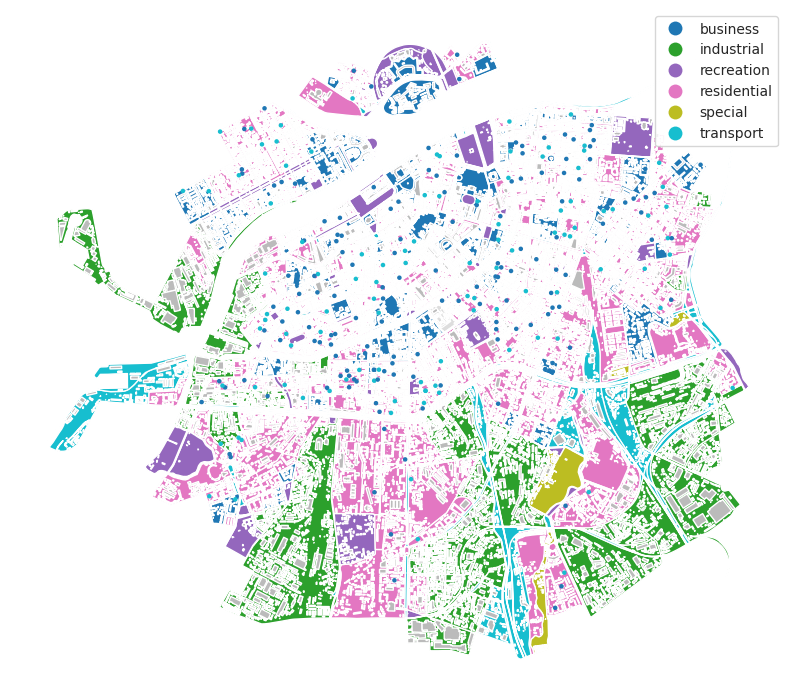

In [32]:
city.plot()